<img src="https://www.comet.ml/images/logo_comet_light.png" width="200px"/>

# Comet.ml REST API

*This page is available as an executable or viewable **Jupyter Notebook**:* <br/>
<a href="https://mybinder.org/v2/gh/comet-ml/comet-examples/master?filepath=notebooks%2FComet-REST-API.ipynb" target="_parent"><img align="left" src="https://mybinder.org/badge_logo.svg"></a>
<a href="https://nbviewer.jupyter.org/github/comet-ml/comet-examples/blob/master/notebooks/Comet-REST-API.ipynb" target="_parent"><img align="right" src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.png" width="109" height="20"></a>
<br/>
<hr/>
Comet.ml has an extensive interface to all of your data using a [REST API](https://en.wikipedia.org/wiki/Representational_state_transfer) through [Comet.ml endpoints](https://www.comet.ml/docs/rest-api/endpoints/). Now, you can access this information easily through the Comet.ml Python SDK. Requires version comet_ml version 1.0.40 or greater.

## Setup

To run the following experiments, you'll need to set your COMET_API_KEY and COMET_REST_API_KEY. The easiest way to to this is to set the values in a cell like this:

```python
import comet_ml

comet_ml.save(api_key="...", rest_api_key="...")
```
where you replace the ...'s with your keys.

You can get your COMET_API_KEY under your quickstart link (replace YOUR_USERNAME with your Comet.ml username):

https://www.comet.ml/YOUR_USERNAME/quickstart

You can get your COMET_REST_API_KEY under your settings (replace YOUR_USERNAME with your Comet.ml username):

https://www.comet.ml/YOUR_USERNAME/settings/account

## Quick Overview

To access the REST API through the Comet.ml SDK, you will need to make an API() instance. First, we import the API class and other libraries we will need:

In [1]:
from comet_ml.papi import API
import comet_ml

import matplotlib.pyplot as plt
%matplotlib inline

and create the API instance:

In [2]:
comet_api = API()

Using the `comet_api` instance, you can get the name of your workspaces:

In [3]:
comet_api.get()

['collaboration', 'conx', 'team-comet-ml', 'ceceshao1', 'dsblank']

If you reference your workspace by name using comet_api.get(WORKSPACE_NAME), you'll see your projects:

In [4]:
comet_api.get("dsblank")

['optimizer-11',
 'pytorch',
 'comet-examples',
 'mnist-001',
 'xor',
 'java-sdk',
 'test-007',
 'visualizations',
 'xor3',
 'opt-prod-iii',
 'mnist-002',
 'dscout',
 'strata',
 'optimizer-12',
 'xor2',
 'test-epochs',
 'test-experiment',
 'odcs-east-2019',
 'histograms',
 'optimizer-1-0-0',
 'multi-process',
 'conx',
 'prj-name',
 'predictor-00',
 'optimizer-3',
 'optimizer-5',
 'optimizer-2-1',
 'optimizer-12',
 'ludwig',
 'pypy',
 'tensorflow',
 'optimizer-2',
 'odsc-east',
 'comet-notebooks',
 'optimizer-1',
 'optimizer-4',
 'odsc-east-2019',
 'temp',
 'pycon2019',
 'keras-optimizer-example',
 'chainer',
 'mnist-014',
 'notebook-test',
 'optimizer',
 'multi-process',
 'interactive-figures',
 'general',
 'predictive-learning-curve',
 'jupyter-experiments',
 'google-ml',
 'matplotlib',
 'keras',
 'fastai',
 'test']

Or, get the projects from another user's workspace:

In [5]:
comet_api.get("cometpublic")

['ludwig',
 'comet-sagemaker',
 'fasttext',
 'comet-notebooks',
 'parameter-space-exploration',
 'home-credit']

Using the same method, you can refer to a project by name:

In [6]:
comet_api.get("dsblank", "keras")

[<APIExperiment 'dsblank/keras/5dc346a883964bd2b8864c40940fd864'>,
 <APIExperiment 'dsblank/keras/351afa6e498f452ca743c19d3e131767'>,
 <APIExperiment 'dsblank/keras/72b89ab961cd42db91535026687f86fb'>,
 <APIExperiment 'dsblank/keras/d5d3cf989efd4b5f8841bd64fee5f817'>,
 <APIExperiment 'dsblank/keras/12ab8382de254a9bb678bf3d6131e255'>,
 <APIExperiment 'dsblank/keras/example 001'>]

Or, using the slash delimiter:

In [7]:
comet_api.get("dsblank/keras")

[<APIExperiment 'dsblank/keras/5dc346a883964bd2b8864c40940fd864'>,
 <APIExperiment 'dsblank/keras/351afa6e498f452ca743c19d3e131767'>,
 <APIExperiment 'dsblank/keras/72b89ab961cd42db91535026687f86fb'>,
 <APIExperiment 'dsblank/keras/d5d3cf989efd4b5f8841bd64fee5f817'>,
 <APIExperiment 'dsblank/keras/12ab8382de254a9bb678bf3d6131e255'>,
 <APIExperiment 'dsblank/keras/example 001'>]

And one more level, get the details of an experiment:

In [8]:
comet_api.get("dsblank", "keras", '5dc346a883964bd2b8864c40940fd864')

<APIExperiment 'dsblank/keras/5dc346a883964bd2b8864c40940fd864'>

Or, again using the slash shorthand:

In [9]:
comet_api.get("dsblank/keras/5dc346a883964bd2b8864c40940fd864")

<APIExperiment 'dsblank/keras/5dc346a883964bd2b8864c40940fd864'>

Let's get the experiment and save it to a variable named `exp`:

In [10]:
exp = comet_api.get("dsblank/keras/51cf6e588a3346cdb560fd0c09d49610")

In [11]:
exp

<APIExperiment 'dsblank/keras/example 001'>

There are a number of items you get from the APIExperiment instance:

In [12]:
help(exp)

Help on APIExperiment in module comet_ml.papi object:

class APIExperiment(builtins.object)
 |  The APIExperiment class is used to access data from the
 |  Comet.ml Python API.
 |  
 |  You can use an instance of the APIExperiment() class to easily
 |  access all of your logged experiment information
 |  at [Comet.ml](https://www.comet.ml), including metrics, parameters,
 |  images, tags, and assets.
 |  
 |  ```
 |  >>> import comet_ml
 |  >>>> comet_api = comet_ml.API()
 |  
 |  ## Get an APIExperiment:
 |  >>>  experiment = comet_api.get("cometpublic/comet-notebooks/example 001")
 |  
 |  ## Get metrics:
 |  >>> experiment.metrics_raw["train_accuracy"]
 |  ```
 |  
 |  For more usage examples, see [Comet Python API examples](../Comet-REST-API/).
 |  
 |  Methods defined here:
 |  
 |  __init__(self, api, workspace, project, experiment_key)
 |      Python API Experiment interface.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  add_tags(self, tags)
 |      Append onto an 

For example, we can explore the `other` property, which shows items saved with Experiment.log_other(NAME, VALUE):

In [13]:
exp.get_other()

[{'name': 'Name',
  'valueMax': 'example 001',
  'valueMin': 'example 001',
  'valueCurrent': 'example 001',
  'timestampMax': 1544452402114,
  'timestampMin': 1544452402114,
  'timestampCurrent': 1544452402114},
 {'name': 'trainable_params',
  'valueMax': '134794',
  'valueMin': '134794',
  'valueCurrent': '134794',
  'timestampMax': 1542738532810,
  'timestampMin': 1542738532810,
  'timestampCurrent': 1542738532810}]

In this example, we see that the experiment has the `Name` "example 001". We can use `Name` to also look up experiments:

In [14]:
exp = comet_api.get("dsblank/keras/example 001")
exp.id, exp.name

('51cf6e588a3346cdb560fd0c09d49610', 'example 001')

Perhaps one of the most useful abilities for the REST API is to access your experiment's data in order to create a variation of a plot. To access the raw metric data, use the `.metrics_raw` property of the experiment:

In [15]:
exp.get_metrics_raw()

[{'metricName': 'acc',
  'metricValue': '0.09166666865348816',
  'timestamp': 1542738532966,
  'step': 1,
  'epoch': None,
  'runContext': None,
  'offset': 21},
 {'metricName': 'loss',
  'metricValue': '2.429072618484497',
  'timestamp': 1542738532966,
  'step': 1,
  'epoch': None,
  'runContext': None,
  'offset': 20},
 {'metricName': 'size',
  'metricValue': '120',
  'timestamp': 1542738532966,
  'step': 1,
  'epoch': None,
  'runContext': None,
  'offset': 19},
 {'metricName': 'batch',
  'metricValue': '0',
  'timestamp': 1542738532965,
  'step': 1,
  'epoch': None,
  'runContext': None,
  'offset': 18},
 {'metricName': 'acc',
  'metricValue': '0.30000001192092896',
  'timestamp': 1542738533006,
  'step': 11,
  'epoch': None,
  'runContext': None,
  'offset': 25},
 {'metricName': 'loss',
  'metricValue': '2.2541863918304443',
  'timestamp': 1542738533006,
  'step': 11,
  'epoch': None,
  'runContext': None,
  'offset': 24},
 {'metricName': 'size',
  'metricValue': '120',
  'timesta

Thus, there were over 2000 metrics logged during the training of this experiment. We can get the first using indexing with an integer:

In [16]:
exp.get_metrics_raw()[0]

{'metricName': 'acc',
 'metricValue': '0.09166666865348816',
 'timestamp': 1542738532966,
 'step': 1,
 'epoch': None,
 'runContext': None,
 'offset': 21}

That shows that the "acc" (accuracy) metric had a value of about 0.09 at step 1 of the experiment.

We can also use a string as an index to query all of the dictionaries in `metrics_raw` to only give those values at each step, like so:

In [17]:
acc_metrics = exp.get_metrics_raw("acc")

In [18]:
len(acc_metrics)

510

In [19]:
acc_metrics[0]

(0, 0.09166666865348816)

Therefore, `exp.metrics_raw["acc"]` gives us (step, value) for all "acc" items. We can then easily use Python's built in zip and matplotlib to plot these values:

In [20]:
steps, acc = zip(*acc_metrics)

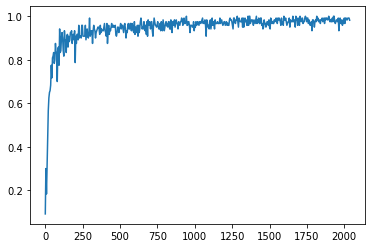

In [21]:
plt.plot(steps, acc);

That's it for a quick overview. Now let's look in detail at each component, and introduce the low-level REST API as well.

## Workspaces

By default, comet_api.get() reports only your workspace names:

In [22]:
comet_api.get()

['collaboration', 'conx', 'team-comet-ml', 'ceceshao1', 'dsblank']

You can also interate over those names:

In [23]:
for workspace in comet_api.get():
    print(workspace)

collaboration
conx
team-comet-ml
ceceshao1
dsblank


As we saw above, you can also access other public workspaces as well:

In [24]:
comet_api.get("cometpublic")

['ludwig',
 'comet-sagemaker',
 'fasttext',
 'comet-notebooks',
 'parameter-space-exploration',
 'home-credit']

## Projects

Under get(WORKSPACE_NAME), you'll find the projects:

In [25]:
comet_api.get("cometpublic")

['ludwig',
 'comet-sagemaker',
 'fasttext',
 'comet-notebooks',
 'parameter-space-exploration',
 'home-credit']

In [26]:
project = comet_api.get("cometpublic", "comet-notebooks")
## OR:
#project = comet_api.get("cometpublic/comet-notebooks")

If you just print out, or iterate over a project, you get access to the experiment ids:

In [27]:
project

[<APIExperiment 'cometpublic/comet-notebooks/7092a5e4c362453fb0b3f06785a1d30c'>,
 <APIExperiment 'cometpublic/comet-notebooks/example 001'>]

In [28]:
project[0].id, project[0].name

('7092a5e4c362453fb0b3f06785a1d30c', None)

In [29]:
project[1].id, project[1].name

('d21f94a1c71841d2961da1e6ddb5ab20', 'example 001')

## Experiments

Continuing with the dictionary-like access, you can see and iterate over the experiment ids:

In [30]:
comet_api.get("cometpublic", "comet-notebooks")

[<APIExperiment 'cometpublic/comet-notebooks/7092a5e4c362453fb0b3f06785a1d30c'>,
 <APIExperiment 'cometpublic/comet-notebooks/example 001'>]

In [31]:
exp = comet_api.get("cometpublic", "comet-notebooks", 'd21f94a1c71841d2961da1e6ddb5ab20')
## OR
# exp = comet_api.get("cometpublic/comet-notebooks/d21f94a1c71841d2961da1e6ddb5ab20")
exp

<APIExperiment 'cometpublic/comet-notebooks/example 001'>

In [32]:
exp = comet_api.get("cometpublic", "comet-notebooks", 'example 001')
## OR
## exp = comet_api.get("cometpublic/comet-notebooks/example 001")
exp

<APIExperiment 'cometpublic/comet-notebooks/example 001'>

### Regular Expression Experiment Name Matching

You can also use regular expressions as the name for the experiment:

In [33]:
comet_api.get("cometpublic", "comet-notebooks", "example.*")

<APIExperiment 'cometpublic/comet-notebooks/example 001'>

### Experiment Properties

In this brief dictionary representation, you will see that `other`, `metrics` and `parameters` give a list of names. However, as we saw above, you can get more information through properties of those same names:

names through exp.data["properties"] and more detail at exp.properties:

In [34]:
exp.get_parameters()

[{'name': 'f',
  'valueMax': '/run/user/1000/jupyter/kernel-b1c4403c-c673-4e7f-90dc-853616d231e2.json',
  'valueMin': '/run/user/1000/jupyter/kernel-b1c4403c-c673-4e7f-90dc-853616d231e2.json',
  'valueCurrent': '/run/user/1000/jupyter/kernel-b1c4403c-c673-4e7f-90dc-853616d231e2.json',
  'timestampMax': 1542823692798,
  'timestampMin': 1542823692798,
  'timestampCurrent': 1542823692798}]

names through exp.data["other"] and more detail at exp.other:

In [35]:
exp.get_other()[0]["name"], exp.get_other()[0]["valueCurrent"]

('Name', 'example 001')

names through exp.data["metrics"] and more detail at exp.metrics:

In [36]:
exp.get_metrics()

[{'name': 'train_accuracy',
  'valueMax': '0.0',
  'valueMin': '0.0',
  'valueCurrent': '0.0',
  'timestampMax': 1542823699380,
  'timestampMin': 1542823699380,
  'timestampCurrent': 1542823704609,
  'runContextMax': 'train',
  'runContextMin': 'train',
  'runContextCurrent': 'train',
  'stepMax': 1,
  'stepMin': 1,
  'stepCurrent': 3},
 {'name': 'train_curr_epoch',
  'valueMax': '1.0',
  'valueMin': '0.0',
  'valueCurrent': '1.0',
  'timestampMax': 1542823693885,
  'timestampMin': 1542823693885,
  'timestampCurrent': 1542823699380,
  'runContextMax': 'train',
  'runContextMin': 'train',
  'runContextCurrent': 'train'},
 {'name': 'train_loss',
  'valueMax': '2.3872790336608887',
  'valueMin': '2.3872790336608887',
  'valueCurrent': '2.3872790336608887',
  'timestampMax': 1542823695820,
  'timestampMin': 1542823695820,
  'timestampCurrent': 1542823695820,
  'runContextMax': 'train',
  'runContextMin': 'train',
  'runContextCurrent': 'train',
  'stepMax': 0,
  'stepMin': 0,
  'stepCurren

You can see all of the methods and propeties on an experiment instance:

In [37]:
help(exp)

Help on APIExperiment in module comet_ml.papi object:

class APIExperiment(builtins.object)
 |  The APIExperiment class is used to access data from the
 |  Comet.ml Python API.
 |  
 |  You can use an instance of the APIExperiment() class to easily
 |  access all of your logged experiment information
 |  at [Comet.ml](https://www.comet.ml), including metrics, parameters,
 |  images, tags, and assets.
 |  
 |  ```
 |  >>> import comet_ml
 |  >>>> comet_api = comet_ml.API()
 |  
 |  ## Get an APIExperiment:
 |  >>>  experiment = comet_api.get("cometpublic/comet-notebooks/example 001")
 |  
 |  ## Get metrics:
 |  >>> experiment.metrics_raw["train_accuracy"]
 |  ```
 |  
 |  For more usage examples, see [Comet Python API examples](../Comet-REST-API/).
 |  
 |  Methods defined here:
 |  
 |  __init__(self, api, workspace, project, experiment_key)
 |      Python API Experiment interface.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  add_tags(self, tags)
 |      Append onto an 

For example, just like when creating and logging data, you can also use the `.display()` method to show the Comet.ml page for that experiment right in the notebook:

In [38]:
exp.display()

You can get an existing experiment:

In [40]:
e = comet_api.get("dsblank", "chainer", "596d91ae1dbc420c9b13a3ced858de3c")
API_KEY = comet_ml.get_config()["comet.api_key"]
ee = comet_ml.ExistingExperiment(API_KEY, previous_experiment=e.id)

COMET INFO: Experiment is live on comet.ml https://www.comet.ml/dsblank/chainer/596d91ae1dbc420c9b13a3ced858de3c



You can make changes to the saved data using the existing experiment:

https://www.comet.ml/docs/python-sdk/ExistingExperiment/

In [41]:
ee.end()

COMET INFO: ----------------------------
COMET INFO: Comet.ml Experiment Summary:
COMET INFO:   Data:
COMET INFO:     url: https://www.comet.ml/dsblank/chainer/596d91ae1dbc420c9b13a3ced858de3c
COMET INFO: ----------------------------
COMET INFO: Uploading stats to Comet before program termination (may take several seconds)


### Examples

Comet.ml is working on a query API which will allow highly efficient queries of your data. However, you can also write your own query of sorts.

Here is some code that prints out the names of experiments that have associated HTML (this can take a long time if you have many experiments):

In [42]:
%%time
for workspace in comet_api.get():
    print("processing workspace", workspace, "...")
    for project in comet_api.get(workspace):
        print("    processing project", project, "...")
        for exp_id in comet_api.get(workspace, project):
            exp = comet_api.get(workspace, project, exp_id)
            if exp.html != None:
                print("found html in %s!" % exp.key)

processing workspace collaboration ...
    processing project collaboration ...
processing workspace conx ...
    processing project xor ...
processing workspace team-comet-ml ...
    processing project lc-predictor-datasets ...
    processing project comet-benchmark ...


TypeError: first argument must be string or compiled pattern

Here is a function that will find the first experiment that has associated images:

In [46]:
def find_image():
    for workspace in comet_api.get():
        for project in comet_api.get(workspace):
            for exp_id in comet_api.get(workspace, project):
                exp = comet_api.get(workspace, project, exp_id)
                if exp.images != []:
                    return exp

In [47]:
find_image()

<APIExperiment 'ceceshao1/jupyter-experiments/56b1555aecb049ed80bcb2733373d93e'>

Now, we get the experiment API and explore the `.images` property:

In [43]:
comet_api.get('dsblank/pytorch/3b56611892b7447aa8c4486a6eeb27d0').get_images()

[{'experimentKey': '3b56611892b7447aa8c4486a6eeb27d0',
  'figCounter': 0,
  'figName': 'Exponential Slowdown',
  'step': None,
  'runContext': None,
  'fileName': '4ykmnOHJFZkrRD36KDrTXvHJk.svg',
  'fileSize': 0,
  'imagePath': 'https://s3.amazonaws.com/comet.ml/4ykmnOHJFZkrRD36KDrTXvHJk.svg',
  'createdAt': 1542116223922,
  'imageId': 'X94DIfASupKj74rIK6PMVDimk'}]

We can get a URL for the image, and display it in the notebook:

In [44]:
url = comet_api.get('dsblank/pytorch/3b56611892b7447aa8c4486a6eeb27d0').get_images()[0]["imagePath"]
url

'https://s3.amazonaws.com/comet.ml/4ykmnOHJFZkrRD36KDrTXvHJk.svg'

In [45]:
from IPython.display import Image

In [46]:
Image(url=url)

Now, let's write a short program that will find the run with the best accuracy given a workspace/project string:

In [47]:
def find_best_run(project):
    runs = []
    for exp_id in comet_api.get(project):
        exp = comet_api.get(project, experiment=exp_id)
        accs = [x["valueMax"] for x in exp.get_metrics() if x["name"] == "acc"]
        if len(accs) > 0:
            runs.append([float(accs[0]), exp])
    if runs:
        return sorted(runs, key=lambda v: v[0], reverse=True)[0]

In [48]:
find_best_run("cometpublic/fasttext")

TypeError: first argument must be string or compiled pattern

Can we get all of the `hidden_size` parameter values for the experiments in dsblank/pytorch?

In [51]:
[[p["valueCurrent"] for p in exp.get_parameters()] for exp in comet_api.get("dsblank/pytorch")]

[['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', 'true', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2

In [52]:
experiments = [[(exp, "hidden_size", int(param["valueCurrent"])) 
                for param in exp.get_parameters() 
                if param["name"] == "hidden_size"]
               for exp in comet_api.get("dsblank/pytorch")]
experiments = [e[0] for e in experiments if len(e) > 0]

In [53]:
experiments[0]

(<APIExperiment 'dsblank/pytorch/5f540fc7894146f4bbfd21ebe8549fcf'>,
 'hidden_size',
 128)

### Assets

To get an asset, you need to get the asset_id. You can see all of the assets related to a project using the `APIExperiment.asset_list`:

In [ ]:
def find_asset():
    for ws in comet_api.get():
        for pj in comet_api.get(ws):
            for exp in comet_api.get(ws, pj):
                if exp.get_asset_list() != []:
                    return (exp, exp.get_asset_list())
exp, elist = find_asset()

From there, you can use the `APIExperiment.get_asset(asset_id)` method to get the asset.

In [83]:
h5 = exp.get_asset("a6c75ebcfd344c06a4934b97641ea87e")

We hope that this gives you some ideas of how you can use the Comet REST API!